In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # color stuff
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit
%matplotlib inline

# def pltDefaultPar():
#     #reset default matplotlib parameters for this notebook
#     plt.rcParams.update({'font.size': 20})
#     plt.rcParams['lines.linewidth'] = 1
#     plt.rcParams['lines.markersize'] = 6
    
def pltPrintPar():
    plt.rcParams.update({'font.size': 11})
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['lines.markersize'] = 6

rootTP="/home/johann/Remote/imac"
rootMAC="/Users/jh"
root=rootMAC

# TODO 
- running new simulations on yoshi with newlub and aop=0.53 to test good value for a, such that $D/D_0=0.9$ at $U_0=0$ with ncells=2 --> Running on yoshi! Increasing the system size like that could lead to larger diffusivities. This in turn might allow me to use a larger relative polymer chain diameter $a/b=0.05$, which leads to phi(a/b=0.05)=0.006, like in the experiment by Jason, as shown below.

___________________________

In [2]:
aop=0.53
def getDoaDataVaryU(u0s,aop=0.53,kstr='1.000',steric='LJ',dt='0.0005'):
    folder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+steric+"/dt"+dt+"/t200/"
    usdata=[]
    for u0 in u0s:
        data=[]
        for adir in os.listdir(folder):
            a=float(adir[1:])
            p=a/aop
            pstr='%s' % float('%g' % p)
            pstr=pstr.rstrip('0').rstrip(".")
            arel=a/10.
            prel=p/10.
            file=os.path.join(folder, adir,'d0/b10/p'+pstr+'/k'+kstr+'/u'+str(u0)+'/InstantValues/linear_fit_parametersMSD.txt')
            #print(file)
            if os.path.isfile(file):
                #print(file)
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(a),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
            else: print("Error: File not found!\n"+str(file))
        usdata.append(np.array(data))
    return usdata

### using LJ
##### Conlusion:
Seems a value of $a=0.03b$ would be a good choice to reach $D/D_0=0.9$ for high ion concentrations.

Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/LJ/dt0.0005/t200/a0.35/d0/b10/p0.660377/k0.100/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/LJ/dt0.0005/t200/a0.35/d0/b10/p0.660377/k0.100/u4/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/LJ/dt0.0005/t200/a0.35/d0/b10/p0.660377/k0.100/u-7/InstantValues/linear_fit_parametersMSD.txt


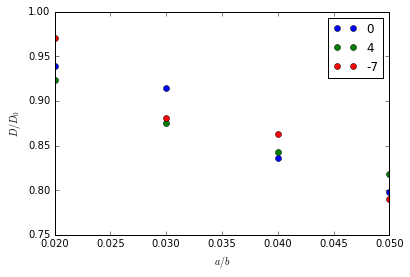

In [3]:
aop=0.53
u0s=[0,4,-7]
datas = getDoaDataVaryU(u0s,aop=aop,kstr='0.100',steric='LJ')
for i,data in enumerate(datas):
    dd0s=data[:,1]/6
    avals=data[:,0]/10.
    plt.plot(avals,dd0s,'o',label=str(u0s[i]))
plt.legend()
plt.xlabel('$a/b$')
plt.ylabel('$D/D_0$')
plt.show()

#### using STERIC

Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/steric/dt0.001/t200/a0.5/d0/b10/p0.943396/k0.100/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/steric/dt0.001/t200/a1/d0/b10/p1.88679/k0.100/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/steric/dt0.001/t200/a1.5/d0/b10/p2.83019/k0.100/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/steric/dt0.001/t200/a2/d0/b10/p3.77358/k0.100/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/steric/dt0.001/t200/a2.5/d0/b10/p4.71698/k0.100/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/S

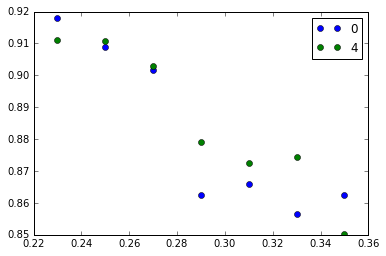

In [4]:
aop=0.53
u0s=[0,4]
datas = getDoaDataVaryU(u0s,aop=aop,kstr='0.100',steric='steric',dt='0.001')
for i,data in enumerate(datas):
    dd0s=data[:,1]/6
    avals=data[:,0]
    plt.plot(avals,dd0s,'o',label=str(u0s[i]))
plt.legend()
plt.show()

#### Calculate the specific volume of dextran
In the paper Johansson1991 it is stated, that dextran has a specific volume of $v=0.61$ml/g.

Using my simulation I compute the dextran concentration with eq.22 (EPJE). Using this formula, I can also calculate the according specific volume:
$$v=\frac{V_{monomer}}{m_{monomer}}$$
where the monomer volume is the volume of a cylinder with the length $a_{dex}$ and the diameter $a_{dex}+a_{water}$.
$$V_{monomer,dex,water}=\pi (\frac{a_{dex}+a_{water}}{2})^2 \cdot (a_{dex})\,=\,0.748 \text{ml/g} \;.$$

In [5]:
#Experimental parameters Dextran And Alexa
m_a=162*1.66
a_exCpoly=0.4
a_water=0.4
V_mondexwat=np.pi*((a_exCpoly+a_water)/2)**2 * a_exCpoly
V_mondexwat=np.pi*((a_exCpoly+a_water)/2)**2 * a_exCpoly
#V_mon=np.pi*((a_exCpoly)/2)**2 * a_exCpoly
print("V_mondexwat ",V_mondexwat)
print("v_dexwat = ",V_mondexwat/m_a*1e3,"ml/g")

V_mondex=np.pi*((a_exCpoly)/2)**2 * a_exCpoly
print("V_mondex ",V_mondex)
print("v_dex = ",V_mondex/m_a*1e3,"ml/g")

V_mondexwat  0.2010619298297468
v_dexwat =  0.7476644720725376 ml/g
V_mondex  0.0502654824574367
v_dex =  0.1869161180181344 ml/g


In [6]:
# alternative approach via polymer volume fraction phi
# the volume fraction is the specific volume multiplied with the polymer mass concentration
v_dex = 0.61e-3 # l/g
C_poly = 10 #g/l is the polymer concentration for the D over Cion data by Jason
phi_exp = v_dex*C_poly
print('phi_experiment =',phi_exp)
# Now calculate the polymer volume fraction in the simulations:
Vcyl = lambda a, b: np.pi*b*(a/2.)**2
def phi(aob): return (3*Vcyl(aob,b=1) - 8 * np.sqrt(2) * (aob/2.)**3)
print('phi_sim =',phi(0.035))
atest=0.05
print('with a/b =',atest,'phi_sim =',phi(atest))

phi_experiment = 0.0060999999999999995
phi_sim = 0.002825703844
with a/b = 0.05 phi_sim = 0.00571370953018


In [7]:
a=2*0.37+0.4
p=1.5
aop=a/p
print('aop ',aop)
y


aop  0.7600000000000001


NameError: name 'y' is not defined

#### Conclusion:
It appears as though the simulations are run with a too small polymer volume fraction. With a larger polymer volume fraction of around $a=0.05b$ I might get too small diffusivities. Maybe this is managable by performing simulations with n_cells=2.

_____________________
_____________________
_____________________
_____________________
_____________________
_____________________

# Try different particle size. According to Jason, Alexa488 has a diameter of $1.48$ nanometers.
According to source Johansson1991 water has a diameter of 0.38 and dextran a diameter of 0.389. Hence we get
$$a/p = (.38+.389)/1.48 = 0.52$$

If we want to conserve our approximate mesh size $b=23$nm, with $(p+a) = 2.25 nm$, we need to set
$$p/b = 2.25 / 23= 0.098$$

## NOTE:
I should use $(a+p) = 2.25$ to calculate physical value of b. This way, I can use a/p = 0.33 data in 
/Users/jh/Documents/Remote_PC/sheldon_scratch/HI/sim/Release/sim_data/noreset/fitRPinv/test/CG/ntry1/nrods1/steric/dt0.001/t200/a0.33
and
/Users/jh/Documents/Remote_PC/sheldon_scratch/HI/sim/Release/sim_data/noreset/fitRPinv/test/CG/ntry1/nrods1/steric/dt0.0005/t200/a0.33


## After Evalulation:
I find that I can use a slightly smaller relative particle diameter $(a+p)/b = 0.94$, where I set $a = 0.33b$ and $p = 0.61b$. This leads to a mesh size of $b= 23.9$nm. **BUT THE D/Do IS STILL TOO LARGE**

So, now I try $a = 0.31b$ and $p = 0.57b$. This leads to a mesh size of $b= 25.45$nm.

#### In the HI paper 
I will just mention the physical units, i.e. I will say that $p=1.48$nm and $a=.38+.39 = 0.77$ nm and the mesh size $b=23.9$nm, i.e. slightly larger than in the EPJE and bpj papers.

In [8]:
def Cion(k_rel,b_ex):
    return 0.0924*10**3/((k_rel*b_ex)**2)

def krelFromCion(Cion,b_ex):
    return np.sqrt(0.0924*10**3/(Cion*b_ex**2))

# Cion data with HI

In [9]:
CionFile = root + "/Documents/reports-talk-etc/reports/paper/jason/jason_data-DDo2-w-error.txt"
JasonCionAtt = []
JasonCionRep = []
with open(CionFile, 'r') as f:
    for i, line in enumerate(f):
        if i>0:
            lines = line.split()
            JasonCionAtt.append([lines[0]]+lines[3:])
            if str(lines[1]) != 'x':
                JasonCionRep.append(lines[0:4])
JasonCionAtt = (np.asarray(JasonCionAtt)).astype(float)
JasonCionRep = (np.asarray(JasonCionRep)).astype(float)

In [10]:
def getCionData(a,uArr,dt,a_ex,aop=0.54,trigger=''):
    MSD="MSD"
    uArr = [str(u) for u in uArr]
    p=a/aop
    pstr='%s' % float('%g' % p)
    pstr=pstr.rstrip('0').rstrip(".")
    b_ex = a_ex / (a/10.)
    datadir= root + "/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"
    datadir+=trigger+"/dt"+dt+"/t200/a"+str(a)+"/d0/b10/p"+pstr
    if trigger=='NoHI':
        datadir=root + "/Documents/workspace-cpp/SingleParticleSimulation/sim_dataOLD/noreset/dt0.0005/t200/d0/b10/p"+pstr
        MSD=""
    dataArr=[]
    for u  in uArr:
        folder = datadir
        data = []
        for kdir in os.listdir(folder): 
            if "DS" in kdir: continue
            k=float(kdir[1:])/10
            file=os.path.join(folder, kdir,'u'+str(u)+'/InstantValues/linear_fit_parameters'+MSD+'.txt')
            if os.path.isfile(file):
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(k),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
            #else: print(file)
        dataArr.append(np.array(sorted(data)))
    return dataArr, b_ex


In [14]:
def plotCionData(data,b_ex,uArr=[None],tofile=False,filename='tmp',figsize=(6,4)):
    if uArr == [None]:
        uArr = len(data)*[None]
    pltPrintPar()
    plt.figure(facecolor='white',figsize=figsize)
    plt.errorbar(JasonCionAtt[:,0]+20,JasonCionAtt[:,1],fmt='^',yerr=JasonCionAtt[:,2],label="Dextran(+)")
    plt.errorbar(JasonCionRep[:,0]+16,JasonCionRep[:,1],fmt='^',yerr=JasonCionRep[:,2],label="Dextran(-)")
    for i,dat in enumerate(data):
        ti = str(uArr[i])
        k_rel = dat[:,0]
        dd0 = dat[:,1]/6.
        cpoly = Cion(k_rel,b_ex)
        plt.plot(cpoly,dd0,'x-',label="$U_0/k_BT = "+ti+"$",mew=1.2,ms=7)
    plt.xlabel(r'$C_{Ion}$ / mM')
    plt.ylabel(r'$D/D_0$')
    plt.xlim([0,225])
    plt.ylim([0,1.15])
    plt.legend(loc=4)
    if tofile==True:
        pp = PdfPages('figures/'+filename+'.pdf')
        pp.savefig(bbox_inches='tight')
        pp.close()
    else:
        plt.show()

In [12]:
a_ex_Cion = 0.8 #nanometer
aop=0.54

### LJ + newlub

26.666666666666668


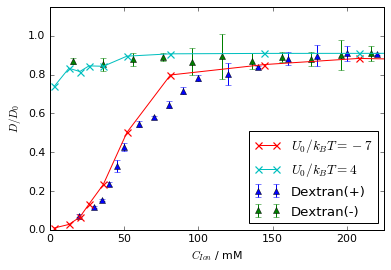

In [104]:
#NOTE: This IS THE RESULT OF USING THE NEWLUB CORRECTED LUBRICATION + LJ with eps=1
a=0.30
us=['-7','4']
dt='0.0005'
adata, bex = getCionData(a,us,dt,a_ex_Cion,aop=0.53,trigger='LJ')
print(bex)
plotCionData(adata,bex,us)

25.0


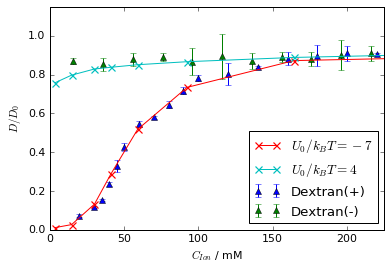

In [49]:
a=0.32
us=['-7','4']
dt='0.0005'
adata, bex = getCionData(a,us,dt,a_ex_Cion,aop=0.53,trigger='LJ025')
print(bex)
plotCionData(adata,bex,us,tofile=True,filename='D_over_Cion_Jason_a032')

24.242424242424242


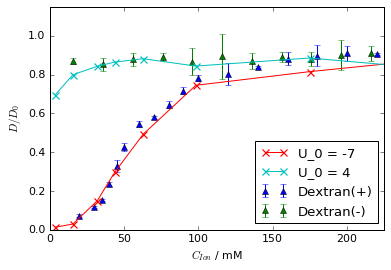

In [17]:
a=0.33
us=['-7','4']
dt='0.0005'
adata, bex = getCionData(a,us,dt,a_ex_Cion,aop=0.53,trigger='LJ025')
print(bex)
plotCionData(adata,bex,us)

22.85714285714286


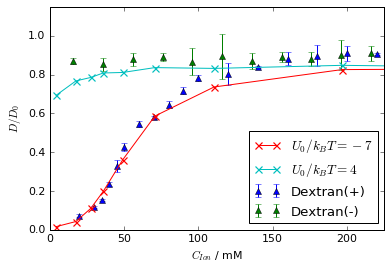

In [24]:
#NOTE: This IS THE RESULT OF USING THE NEWLUB CORRECTED LUBRICATION + LJ with eps=1
a=0.35
us=['-7','4']
dt='0.0005'
adata, bex = getCionData(a,us,dt,a_ex_Cion,aop=0.53,trigger='LJ')
print(bex)
plotCionData(adata,bex,us)

### No LJ + newlub

25.806451612903228


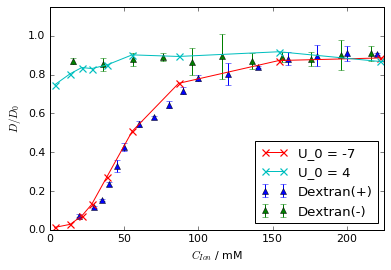

In [10]:
#NOTE: This IS THE RESULT OF USING THE NEWLUB CORRECTED LUBRICATION
a=0.31
us=['-7','4']
dt='0.001'
adata, bex = getCionData(a,us,dt,a_ex_Cion,aop=0.53,trigger='')
print(bex)
plotCionData(adata,bex,us)

### CONCLUSION: 
This already looks good. I can use it, but I should perform longer simulations such that it looks better.
In fact, I should also have a look at a=0.33 and a=0.35

#### No HI


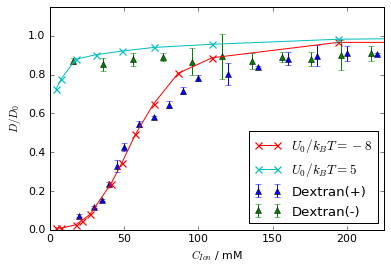

In [22]:
us=['-8','5']
adata, bex = getCionData(a=1,uArr=us,dt='DUMMY',a_ex=1,aop=1,trigger='NoHI')
bex=23
#print(adata)
plotCionData(adata,bex,us,tofile=True,filename='D_over_Cion_Jason_noHI')

25.0


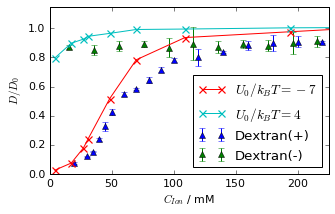

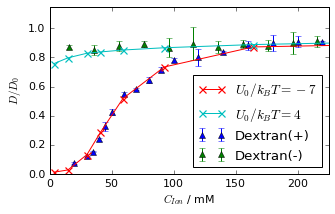

In [21]:
us=['-7','4']
adata, bex = getCionData(a=1,uArr=us,dt='DUMMY',a_ex=1,aop=1,trigger='NoHI')
bex=23
#print(adata)
plotCionData(adata,bex,us,tofile=True,filename='DoCProjektskizzeNoHI',figsize=[5,3])

a=0.32
us=['-7','4']
dt='0.0005'
adata, bex = getCionData(a,us,dt,a_ex_Cion,aop=0.53,trigger='LJ025')
print(bex)
plotCionData(adata,bex,us,tofile=True,filename='DoCProjektskizzeWithHI',figsize=[5,3])

__________________________________
__________________________________
__________________________________
__________________________________
__________________________________
# OLD (WRONG) LUB

24.242424242424242


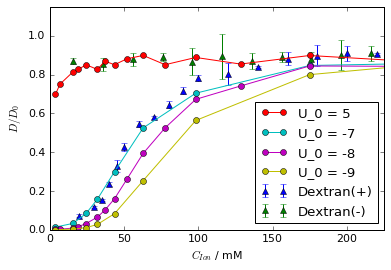

In [188]:
a=0.33
us=['5','-7','-8','-9']
dt='0.0005'
adata, bex = getCionData(a,us,dt,a_ex_Cion)
print(bex)
plotCionData(adata,bex,us,False,'test')

25.806451612903228


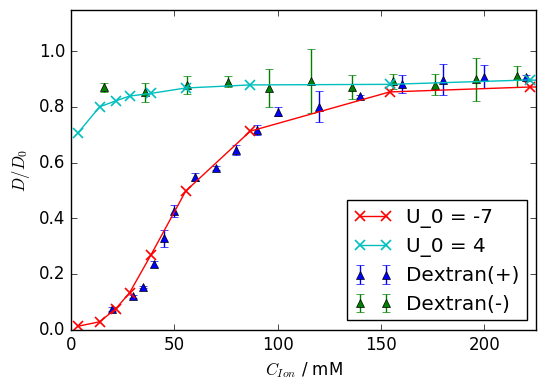

In [407]:
#TODO ! CHECK REDO DATA ON SHELDON! first check if it's better than the current before deleting anything.
a=0.31
us=['-7','4']
dt='0.001'
adata, bex = getCionData(a,us,dt,a_ex_Cion)
print(bex)
plotCionData(adata,bex,us,True,'D_over_Cion_HI_aop054_u4_-7_a031')

26.666666666666668


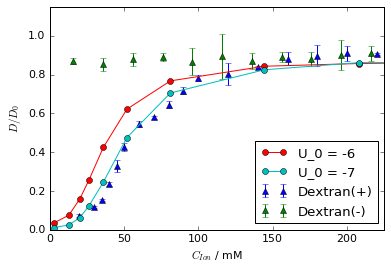

In [345]:
a=0.30
us=['-6','-7']
dt='0.001'
adata, bex = getCionData(a,us,dt,a_ex_Cion)
print(bex)
plotCionData(adata,bex,us,False,'D_over_Cion_HI_aop054_u4_-7_a031')

28.57142857142857


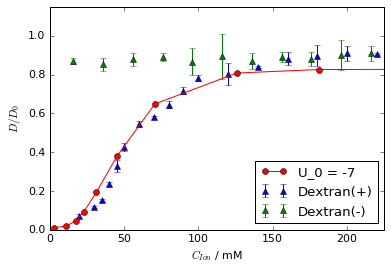

In [190]:
a=0.28
us028=['-7']
dt='0.001'
a028data,bex = getCionData(a,us028,dt,a_ex_Cion)
print(bex)
plotCionData(a028data,bex,us028)

### TODO evaluate this running on yoshi with aop=0.53

30.769230769230766


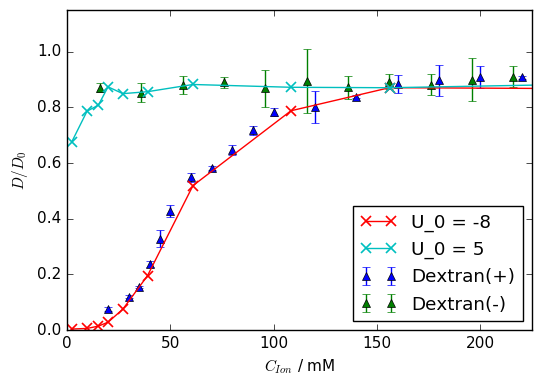

In [398]:
a=0.26
us=['-8','5']
dt='0.001'
adata,bex = getCionData(a,us,dt,a_ex_Cion,aop=0.53)
print(bex)
plotCionData(adata,bex,us)

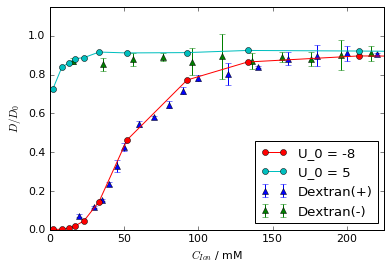

33.333333333333336


In [313]:
##########
## TODO ##
##########
# Evaluate on sheldon a024aop054Extra data, i.e. this data but with u5 and -8
a=0.24
us=['-8','5']
dt='0.001'
adata,bex = getCionData(a,us,dt,a_ex_Cion)
plotCionData(adata,bex,us,False,'D_over_Cion_HI_aop054_u5_-8_a024')
print(bex)

______
______
______

# Compare bpj fig. 4 data to simulations
Do the same stuff, that I did in EPJE fig. 10, but for finite $U_0$, i.e. Alexa488 in charged dextran.
### Relate ion concentration to k
The experiments were performed at zero added NaCl.
In our bpj paper, we established, that the ion concentration due to the TRIS buffer, plus the  ionic strength of the mobile ions that enter the solution upon addition of 1 wt % dextran(+) and dextran(-) correspond to an ion concentration of 16 and 20 mM for dextran(-) and dextran(+), respectively.
This ion concetration leads to a certain interaction range for our interaction potential.
We can use eq. 9 in the EPJE paper (or eq. 8 in my thesis) to calculate it and we obtain (for b=23nm):

In [4]:
print(krelFromCion(16,25.5), krelFromCion(20,25.5))

NameError: name 'krelFromCion' is not defined

$$k_- = 0.1b \quad \text{and} k_+ = 0.093b$$

In [35]:
# For different bex = 32 nm (case aop = 0.54 and a = 0.24 b)
print(krelFromCion(16,32), krelFromCion(20,32))

0.0750975927544 0.0671693289381


In [10]:
# C_polymer FUNCTIONS

#Experimental parameters Dextran And Alexa
m_a=162*1.66
a_exCpoly=0.4 #KEEP THIS AT 0.4!
p_exCpoly=1.9
def prel_simToCalc(p_rel_sim):
    aop_sim = 0.53
    aop_calc = a_exCpoly/p_exCpoly
    return p_rel_sim*(1+aop_sim)/(1+aop_calc)
# This function needs to be used, if I want to calculate the polymer Concentration from the mesh size b
def CpolyFromb(b_ex,a_ex=a_exCpoly,m_a=m_a):#!=C2(p_s) in gp_polymerConcentration OR SEE BELOW
    n_mono = (3*b_ex/a_ex - 2 ) / b_ex**3
    return n_mono * m_a

# This functions needs to be used to calculate Cpoly from p - In the case of HI, where I have separate a and p
def CpolyFrompHI(p_rel_sim,a_ex=a_exCpoly,p_ex=p_exCpoly):#=C2HI(p_rel)=m_a*(p_rel/p_ex)**3  *  ( 3 * p_ex / (p_rel * a_ex) - 2  ) in gp_polymerConcentration
    p_rel_calc = prel_simToCalc(p_rel_sim)
    return m_a*(p_rel_calc/p_ex)**3  *  ( 3 * p_ex / (p_rel_calc * a_ex) - 2  )

def CpolyFrompNoHI(p_s,a_ex=a_exCpoly,p_ex=p_exCpoly):
    return (p_s**3 *m_a / (a_ex*(p_ex+a_ex)**3)) * (3 * (p_ex+a_ex)/p_s - 2 * a_ex)

def CpolyFromFit(p_rel,b_fit,CpolyExpAtbfit=10):#The latter is actually always 10mM, as in Jasons experiment
    # Cpoly should scale as Cpoly(b_fit) = m_a * n_a = m_a * corr * (3*b/a) / b^3 = 3*m_a * corr / (a b^2)
    # Here, corr could be understood as effective monomer bond length
    # Hence, corr = CpolyAtbfit / ( m_a / (a b^2) ) = 
    corr = CpolyExpAtbfit / CpolyFromb(b_ex=b_fit,a_ex=0.4)
    #print(corr)
    return corr * CpolyFrompHI(p_rel)

def CpolyScaleFromb(boxsize_nm,b_fit,a_ex=a_exCpoly):
    theta = 10 * a_ex * b_fit**2 / m_a #Note, that 10 is the polymer concentration used in Jasons experiments
    print(theta)
    return theta * m_a / ( a_ex * boxsize_nm**2 )

   

print(CpolyFrompHI(0.065))
print(CpolyFrompNoHI(0.1))
print(CpolyFromb(25))
print("The above three are approximately the same - good")
print('For the corrected Cpoly I should get approx 10 at p_rel=0.065,b_fit=23: Cpoly =',CpolyFromFit(p_rel=0.065,b_fit=23))
print("Test some other value of b_fit: Cpoly =",CpolyFromFit(p_rel=0.065,b_fit=25.5))
print("CpolyScaleFromb ",CpolyScaleFromb(boxsize_nm=0.8/0.032,b_fit=25))

3.7273619790152157
3.768460590120819
3.19261824
The above three are approximately the same - good
For the corrected Cpoly I should get approx 10 at p_rel=0.065,b_fit=23: Cpoly = 9.89094058403226
Test some other value of b_fit: Cpoly = 12.144038109440244
9.296445039416929
CpolyScaleFromb  10.0


With our calculation method for the polymer mass concentration, we obtain something around
$$\text{print(CpolyFromb(23))} = C_{poly} = 3.9 g/l = 0.39 (w/v)\%$$
for the Alexa488 in dextran model parameters that we used in the ion concetration comparison to Jasons data.
Jason used a polymer concentration of $1 (w/v)\%$. I.e. there is a discrepancy. This can be attributed to our very approximative method of calculating the polymer concentration from $b$ and $a$, i.e. eq. (22) in EPJE.
\begin{align}
    n_d &= \left(\frac{3b}{a}-2\right) \frac{1}{b^3} \:=\: \frac{ C_\mathrm{poly}}{m_a} \: ,\nonumber \\  
   \rightarrow \; C_\mathrm{poly} &= \frac{m_a}{b^3} (\frac{3b}{a}-2) \; ,\nonumber\\
   \rightarrow \; C_\mathrm{poly} &= m_a \big(\frac{p_{rel}}{p_{ex}}\big)^3 (\frac{3 p_{ex}}{p_{rel} a_{ex}}-2) \;
\end{align}

## Note: The next plots are with preliminary simulation data. 
We have not yet settled on correct values for $a$ and $p$
#### $C_{ion}$ simulations:
Here, I used a value of $$a = 0.8 nm \quad p = 1.5 nm \quad b \approx 2.54 nm$$ at the current simulations.
This data is not yet evaluated. It might lead to a too large relative diffusivity $D/D_0$.
## IMPORTANT NOTE:
To calculate the Cpoly with eq. 22 above, I do not need to put in the parameter $a/b$ that was used in the simulation.
**HENCE, I CAN SIMULATE WITH a/p = 0.53, BUT CALCULATE THE CPOLYMER CONCENTRATION WITH a/p = .21**. With the latter, I obtain the "correct" polymer concentration with eq. 22. With the former, I can perform adequate simulations, where the water hydration layer is "part" of the polymer chain diameter.

In [37]:
### Get the data ###

# bpj data from excel file figure 4 data in reports/paper/jason
# first row is Dextran20, which corresponds to uncharged dextran(-)
# second row Dextran500, third row dextran(-), fourth dextran(+)
bpj4data = np.asarray([
    [1,0.925982463,0.831748342,0.798491522,0.753185472,0.695878232,0.670772084,0.630941941,0.599834134],
    [1,0.883121743,0.807151296,0.709870951,0.661140049,0.635088743,0.580538736,0.543552391,0.505993318],
    [1,0.878550339,0.837911679,0.775459276,0.733041935,0.669907265,0.664030792,0.628555042,0.583068535],
    [1,0.074417946,0.108983059,0.146672764,0.143483107,0.153289683,0.152657178,0.164448086,0.17335864]
])
bpj4xvals = np.asarray([0,1,2,3,4,5,6,7,8])*10  # *10 to convert (w/v)% to g/l
bpj4titles = ['Dextran20','Dextran500','Dextran(-)','Dextran(+)']

def getCpolyData(uArr,kArr):
    #TODO
    aop=0.53# This if fixed here, for no HI
    datadir= root + "/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/dt0.0005/t200"
    dataArr=[]
    for u  in uArr:
        folder = datadir
        data = []
        for adir in os.listdir(folder):
            a=float(adir[1:])
            p=a/aop
            pstr='%s' % float('%g' % p)
            pstr=pstr.rstrip('0')
            a=(float(a)/10.)                 # make p value p/b
            p=p/10.
            file=os.path.join(folder, adir,'d0/b10/p'+pstr+'/k1.000/u'+str(u)+'/InstantValues/linear_fit_parametersMSD.txt')
            if os.path.isfile(file):
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        dataArr.append(np.array(sorted(data)))
    u0data = (dataArr)

## THIS IS BAD, I NEED TO ACCOUNT FOR INCREASED IONIC STRENGTH IN SOLUTION WITH INCREASING Cpoly
At 1 (w/v)% I have 6mM for dex- and 10 mM for dex+.
Hence, I get 

Cion- = (buffer) + (dextran-) = 10mM + (w/v)% x 6mM

Cion+ = (buffer) + (dextran+) = 10mM + (w/v)% x 10mM

where g/mol = 10 x (w/v)%

Also, below I have mistakenly kept k constant relative to the box size. This is of course quatsch, since k would rather have had to be kept constant in relation to a and p.
But, combining with the aforementioned fact, that I also have to adjust the ionic strength for increasing dextran concentration, I have to redo the simulations. The range has to be set to the following:

In [2]:
#TODO rewrite this using the new *** CpolyScaleFromb(boxsize_nm,b_fit,a_ex=a_exCpoly) *** function defined above
def krelFromCdextran(Cpoly,b_nm):
    # the boxsize b has is needed in nanometers
    Cion_mM_Att = 10 + 10 * Cpoly/10.
    Cion_mM_Rep = 10 + 6  * Cpoly/10.
    kAtt = krelFromCion(Cion_mM_Att,b_nm)
    kRep = krelFromCion(Cion_mM_Rep,b_nm)
    return kAtt, kRep

def krelFromaob(b_nm,b_ex_fit=1,rescaleCpoly=True):
    #cpolyCorrection = 10/CpolyFromb(b_ex_fit) # CpolyExp = 10 mM
    if rescaleCpoly==True:
        cpoly = CpolyScaleFromb(b_nm,b_ex_fit)
    if rescaleCpoly==False:
        return '.'
        #TODO this is not yet defined. I need to think about b value, if I do not use fit value for b 
    return krelFromCdextran(cpoly,b_nm)

bnm=23
bfit=25
print(CpolyScaleFromb(bnm,bfit))
print(krelFromaob(bnm,bfit,True))
print("This needs to be (0.093452979392194241, 0.10448360731041667): ",krelFromaob(23,23,True))


NameError: name 'CpolyScaleFromb' is not defined

In [39]:
### Get the data ###

# bpj data from excel file figure 4 data in reports/paper/jason
# first row is Dextran20, which corresponds to uncharged dextran(-)
# second row Dextran500, third row dextran(-), fourth dextran(+)

bpj4data = np.asarray([
    [1,0.925982463,0.831748342,0.798491522,0.753185472,0.695878232,0.670772084,0.630941941,0.599834134],
    [1,0.883121743,0.807151296,0.709870951,0.661140049,0.635088743,0.580538736,0.543552391,0.505993318],
    [1,0.878550339,0.837911679,0.775459276,0.733041935,0.669907265,0.664030792,0.628555042,0.583068535],
    [1,0.074417946,0.108983059,0.146672764,0.143483107,0.153289683,0.152657178,0.164448086,0.17335864]
])
bpj4xvals = np.asarray([0,1,2,3,4,5,6,7,8])*10  # *10 to convert (w/v)% to g/l
bpj4titles = ['Dextran20','Dextran500','Dextran(-)','Dextran(+)']

def getCpolyData(uArr,aArr,kArrays,dt='0.001',aop=.53,steric=''):
    #TODO
    datadir= root + "/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+steric+"/dt"+dt+"/t200"
    #tmpdatadir="/Users/jh/Documents/Remote_PC/yoshi_scratch/HI/sim/Release/sim_data/noreset/fitRPinv/steric/dt0.001tmp/t200"
    dataArr=[]
    for i,u  in enumerate(uArr):
        folder = datadir
        data = []
        #for adir in os.listdir(folder):
            #a=float(adir[1:])
        for j, a in enumerate(aArr):
            adir="a"+str(a)
            p=a/aop
            pstr='%s' % float('%g' % p)
            pstr=pstr.rstrip('0').rstrip(".")
            a=(float(a)/10.)                 # make p value p/b
            p=p/10.
            if u==0:
                k='1.000'
            else:
                k="{0:.3f}".format(kArrays[i][j])
            file=os.path.join(folder, adir,'d0/b10/p'+pstr+'/k'+k+'/u'+str(u)+'/InstantValues/linear_fit_parametersMSD.txt')
            #print(file)
            if os.path.isfile(file):
                #print(file)
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
            else: print(file)
        dataArr.append(np.array(sorted(data)))
    return (dataArr)

In [51]:
def plotCpolyData(u0data,cpolyArr,tofile=False,filename='tmp'): 
    pltPrintPar()
    plt.figure(facecolor='white',figsize=(6,4))
    # The p value needs to be corrected, since I calculate using the aop = a_exCpoly/p_exCpoly = 0.21 ratio, whereas the 
    # simulations are performed using the aop = 0.53 ratio, such that the hydration shell does not move with the tracer.
    for i,u0dat in enumerate(u0data):
        ti = "$U_0/k_BT = $"+str(uArr[i])
        dd0 = u0dat[:,1]/6.
        plt.plot(cpolyArr,dd0,'x-',label=ti,mew=1.2,ms=7)
    for i,exdat in enumerate(bpj4data):
        ti = bpj4titles[i]
        dd0 = exdat[:]
        cpoly = bpj4xvals
        plt.plot(cpoly,dd0,'^',label=ti)
    lgd = plt.legend(loc=2, bbox_to_anchor=(1, 1),
              ncol=1, fancybox=False, shadow=False)
    plt.xlim([0,99])
    plt.ylabel('$D/D_0$')
    plt.xlabel('$C_{poly}$ in g/l')
    if tofile==True:
        pp = PdfPages('figures/'+filename+'.pdf')
        pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
        pp.close()
    else:
        plt.show()

bnm_arr [26.666666666666668, 20.0, 13.333333333333334, 10.0, 8.0]
cpoly_arr [8.789062499999998, 15.625, 35.15624999999999, 62.5, 97.65625]
krel_arr [(0.08316004158003118, 0.092235659480460128), (0.094945427200794991, 0.10919057031246467), (0.10728482931932233, 0.12928873844789127), (0.11289299174974014, 0.13947269115833166), (0.11580475034813137, 0.14507872342589859)]
kAtt_arr:  0.83 0.95 1.1 1.1 1.2
kRep_arr:  0.92 1.1 1.3 1.4 1.5
[array([[ 0.05660377,  0.26096719],
       [ 0.0754717 ,  0.44874268],
       [ 0.11320755,  0.94695749],
       [ 0.1509434 ,  1.87047216],
       [ 0.18867925,  2.28061228]]), array([[ 0.05660377,  5.03137897],
       [ 0.0754717 ,  4.72675897],
       [ 0.11320755,  4.15126768],
       [ 0.1509434 ,  3.80152835],
       [ 0.18867925,  3.16555802]]), array([[ 0.05660377,  5.43939184],
       [ 0.0754717 ,  4.85896604],
       [ 0.11320755,  4.56397234],
       [ 0.1509434 ,  4.12347875],
       [ 0.18867925,  3.31582083]])]


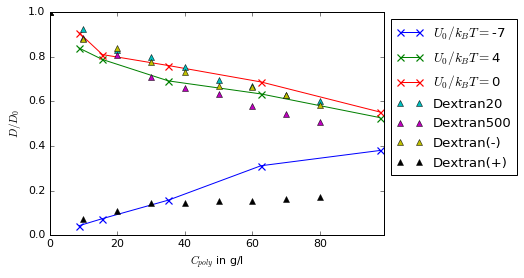

In [52]:
bfit = 25
aop=.53
a_arr=[0.3, 0.4, 0.6, 0.8, 1]
bnm_arr = [0.8/(a/10) for a in a_arr ]
print("bnm_arr",bnm_arr)
cpoly_arr=[CpolyScaleFromb(bnm,bfit) for bnm in bnm_arr]
print("cpoly_arr",cpoly_arr)
krel_arr=[krelFromaob(bnm,bfit,True)  for bnm in bnm_arr]
print('krel_arr',krel_arr)
kAtt_arr=[float('%.2g' % (krel[0]*10)) for krel in krel_arr]
kRep_arr=[float('%.2g' % (krel[1]*10)) for krel in krel_arr]
print('kAtt_arr: ',*kAtt_arr, sep=' ')
print('kRep_arr: ',*kRep_arr, sep=' ')



uArr = [-7,4,0]
kArrays=[kAtt_arr,kRep_arr]
data = getCpolyData(uArr,a_arr,kArrays,dt='0.0005',steric='LJ025')
print(data)
plotCpolyData(data,cpoly_arr,tofile=True,filename='D_over_Cpoly_Jason_a032')


-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
# Old stuff

#### With krelFromaob I can calculate the appropriate ranges for Att and Rep
First, case of $b_{fit} = 32$nm, i.e. a=0.24

In [32]:
bfit = 32
aop=.53
a_arr=[0.1, 0.2, 0.25, 0.35, 0.45, 0.6, 0.7, 0.8]
bnm_arr = [0.8/(a/10) for a in a_arr ]
print("bnm_arr",bnm_arr)
cpoly_arr=[CpolyScaleFromb(bnm,bfit) for bnm in bnm_arr]
print("cpoly_arr",cpoly_arr)
krel_arr=[krelFromaob(bnm,bfit,True)  for bnm in bnm_arr]
print('krel_arr',krel_arr)
kAtt_arr=[float('%.2g' % (krel[0]*10)) for krel in krel_arr]
kRep_arr=[float('%.2g' % (krel[1]*10)) for krel in krel_arr]
print('kAtt_arr',kAtt_arr)
print('kRep_arr',kRep_arr)

bnm_arr [80.0, 40.0, 32.0, 22.85714285714286, 17.77777777777778, 13.333333333333334, 11.42857142857143, 10.0]


NameError: name 'CpolyScaleFromb' is not defined

In [32]:
bfit = 30.7
aop=.53
a_arr=[0.1, 0.25, 0.35, 0.45, 0.6, 0.7, 0.8,.9]
bnm_arr = [0.8/(a/10) for a in a_arr ]
print("bnm_arr",bnm_arr)
cpoly_arr=[CpolyScaleFromb(bnm,bfit) for bnm in bnm_arr]
print("cpoly_arr",cpoly_arr)
krel_arr=[krelFromaob(bnm,bfit,True)  for bnm in bnm_arr]
print('krel_arr',krel_arr)
kAtt_arr=[float('%.2g' % (krel[0]*10)) for krel in krel_arr]
kRep_arr=[float('%.2g' % (krel[1]*10)) for krel in krel_arr]
print('kAtt_arr',kAtt_arr)
print('kRep_arr',kRep_arr)

bnm_arr [80.0, 32.0, 22.85714285714286, 17.77777777777778, 13.333333333333334, 11.42857142857143, 10.0, 8.88888888888889]
cpoly_arr [1.472640625, 9.20400390625, 18.03984765624999, 29.820972656249996, 53.015062499999985, 72.15939062499996, 94.249, 119.28389062499998]
krel_arr [(0.035474338333348419, 0.036421684195548885), (0.068547262336266693, 0.076244152118841904), (0.079419329848278389, 0.092157973983445843), (0.085684561890657318, 0.10237976791912169), (0.090818654478261054, 0.11149673865178263), (0.092793046623257963, 0.11521213394617981), (0.094145601984837887, 0.11783218023752455), (0.095107836275244231, 0.1197353496520238)]
kAtt_arr [0.35, 0.69, 0.79, 0.86, 0.91, 0.93, 0.94, 0.95]
kRep_arr [0.36, 0.76, 0.92, 1.0, 1.1, 1.2, 1.2, 1.2]


In [33]:
bfit = 25.8
afit = 0.31
afitrel=afit/10.
aop=.53
a_arr=[0.2, 0.3, 0.4, 0.6, 0.8, 1]
bnm_arr = [0.8/(a/10) for a in a_arr ]
print("bnm_arr",bnm_arr)
cpoly_arr=[CpolyScaleFromb(bnm,bfit) for bnm in bnm_arr]
print("cpoly_arr",cpoly_arr)
krel_arr=[krelFromaob(bnm,bfit,True)  for bnm in bnm_arr]
print('krel_arr',krel_arr)
kAtt_arr=[float('%.2g' % (krel[0]*10)) for krel in krel_arr]
kRep_arr=[float('%.2g' % (krel[1]*10)) for krel in krel_arr]
print('kAtt_arr',kAtt_arr)
print('kRep_arr',kRep_arr)
print(CpolyScaleFromb(.8/afitrel,.8/afitrel) )
print(krelFromaob(.8/afitrel,.8/afitrel))

bnm_arr [40.0, 26.666666666666668, 20.0, 13.333333333333334, 10.0, 8.0]
cpoly_arr [4.16025, 9.360562499999997, 16.641, 37.44224999999999, 66.564, 104.00625]
krel_arr [(0.063861708607815718, 0.067981051760080249), (0.081923456516908036, 0.091217393888546661), (0.093117375870326369, 0.10751232651780919), (0.1046681649464279, 0.12652816346673504), (0.10985597383721418, 0.13602498095565752), (0.11253345901579369, 0.14121000504539691)]
kAtt_arr [0.64, 0.82, 0.93, 1.0, 1.1, 1.1]
kRep_arr [0.68, 0.91, 1.1, 1.3, 1.4, 1.4]
10.0
(0.083289967883293112, 0.093121015015408842)


In [34]:
bfit = 25.8
afit = 0.31
afitrel=afit/10.
aop=.54
a_arr=[0.2, 0.3, 0.4, 0.6, 0.8, 1]
bnm_arr = [23/(a*(1+1/aop)) for a in a_arr ]
print("bnm_arr",bnm_arr)
cpoly_arr=[CpolyScaleFromb(bnm,bfit) for bnm in bnm_arr]
print("cpoly_arr",cpoly_arr)
krel_arr=[krelFromaob(bnm,bfit,True)  for bnm in bnm_arr]
print('krel_arr',krel_arr)
kAtt_arr=[float('%.2g' % (krel[0]*10)) for krel in krel_arr]
kRep_arr=[float('%.2g' % (krel[1]*10)) for krel in krel_arr]
print('kAtt_arr',kAtt_arr)
print('kRep_arr',kRep_arr)
print(CpolyFrompHI(0.031/.54))

bnm_arr [40.324675324675326, 26.883116883116884, 20.162337662337663, 13.441558441558442, 10.081168831168831, 8.064935064935066]
cpoly_arr [4.093526943452589, 9.210435622768324, 16.374107773810355, 36.8417424910733, 65.49643109524142, 102.33817358631472]
krel_arr [(0.063497300349737273, 0.067541978987039494), (0.081580762230925252, 0.090745044690278429), (0.09283381832204958, 0.10707654947251222), (0.10448882365146937, 0.12621172896745075), (0.10973922445294458, 0.13580353345439763), (0.11245309975959573, 0.14105132578053903)]
kAtt_arr [0.63, 0.82, 0.93, 1.0, 1.1, 1.1]
kRep_arr [0.68, 0.91, 1.1, 1.3, 1.4, 1.4]
2.9114013554557387


In [337]:
bfit = 23
aop=.53
a_arr=[0.2, 0.3, 0.4, 0.6, 0.8, 1, 1.2]
bnm_arr = [0.8/(a/10) for a in a_arr ]
print("bnm_arr",bnm_arr)
cpoly_arr=[CpolyScaleFromb(bnm,bfit) for bnm in bnm_arr]
print("cpoly_arr",cpoly_arr)
krel_arr=[krelFromaob(bnm,bfit,True)  for bnm in bnm_arr]
print('krel_arr',krel_arr)
kAtt_arr=[float('%.2g' % (krel[0]*10)) for krel in krel_arr]
kRep_arr=[float('%.2g' % (krel[1]*10)) for krel in krel_arr]
print('kAtt_arr',kAtt_arr)
print('kRep_arr',kRep_arr)

bnm_arr [40.0, 26.666666666666668, 20.0, 13.333333333333334, 10.0, 8.0, 6.666666666666667]
cpoly_arr [3.30625, 7.439062499999999, 13.225, 29.756249999999994, 52.9, 82.65625, 119.02499999999998]
krel_arr [(0.065879175454555433, 0.069419203136131508), (0.086318858054317715, 0.094783227232666453), (0.099730530364377165, 0.11348939986042852), (0.11433904026857747, 0.136601482406805), (0.12120224462339305, 0.14878521032579625), (0.12482703041040132, 0.15564875143334192), (0.12693760815867586, 0.15979935832116179)]
kAtt_arr [0.66, 0.86, 1.0, 1.1, 1.2, 1.2, 1.3]
kRep_arr [0.69, 0.95, 1.1, 1.4, 1.5, 1.6, 1.6]
10.0
(0.094037060513395457, 0.10513662985610676)


# TODO the according data is running on yoshi

### bfit = 32 nm

### TODO Evaluate this with aop = .54, so that it's the same ratio as for D over Cion YOSHI

In [45]:

a_arr=[0.1, 0.2, 0.25, 0.35, 0.45, 0.6, 0.7, 0.8]
uArr = [-8,5]
cpoly_arr = [1.6, 6.4, 10.0, 19.599999999999987, 32.39999999999999, 57.59999999999999, 78.39999999999995, 102.4]
kAtt_arr= [0.35, 0.59, 0.67, 0.77, 0.83, 0.88, 0.89, 0.91]
kRep_arr= [0.36, 0.65, 0.75, 0.9, 1.0, 1.1, 1.1, 1.1]
kArrays=[kAtt_arr,kRep_arr]
data = getCpolyData(uArr,a_arr,kArrays,dt='0.001')
plotCpolyData(data,cpoly_arr)

bnm_arr [40.0, 26.666666666666668, 20.0, 13.333333333333334, 10.0, 8.0]
cpoly_arr [3.90625, 8.789062499999998, 15.625, 35.15624999999999, 62.5, 97.65625]
krel_arr [(0.064442291926684644, 0.068399422604713767), (0.08316004158003118, 0.092235659480460128), (0.094945427200794991, 0.10919057031246467), (0.10728482931932233, 0.12928873844789127), (0.11289299174974014, 0.13947269115833166), (0.11580475034813137, 0.14507872342589859)]
kAtt_arr:  0.64 0.83 0.95 1.1 1.1 1.2
kRep_arr:  0.68 0.92 1.1 1.3 1.4 1.5
[array([], dtype=float64), array([], dtype=float64)]


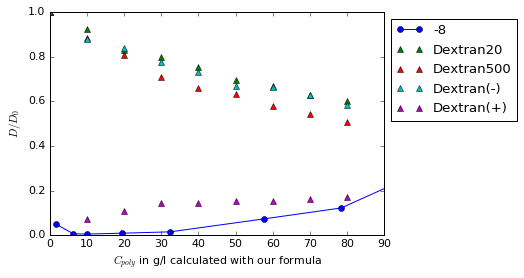

In [332]:
a_arr=[0.1, 0.2, 0.25, 0.35, 0.45, 0.6, 0.7, 0.8]
uArr = [-8]
cpoly_arr = [1.6, 6.4, 10.0, 19.599999999999987, 32.39999999999999, 57.59999999999999, 78.39999999999995, 102.4]
kAtt_arr= [0.35, 0.59, 0.67, 0.77, 0.83, 0.88, 0.89, 0.91]
kRep_arr= [0.36, 0.65, 0.75, 0.9, 1.0, 1.1, 1.1, 1.1]
kArrays=[kAtt_arr,kRep_arr]
data = getCpolyData(uArr,a_arr,kArrays,dt='0.001',aop=.54)
plotCpolyData(data,cpoly_arr)

### bfit = 30 nm  TODO

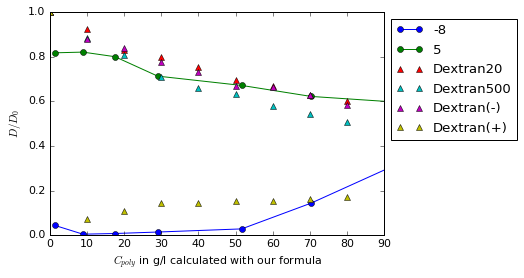

In [322]:
a_arr=[0.1, 0.25, 0.35, 0.45, 0.6, 0.7, 0.8,.9]
uArr = [-8,5]
cpoly_arr = [1.434515625, 8.96572265625, 17.57281640624999, 29.048941406249995, 51.64256249999999, 70.29126562499997, 91.809, 116.19576562499998]
kAtt_arr= [0.36, 0.69, 0.8, 0.87, 0.92, 0.94, 0.95, 0.96]
kRep_arr= [0.36, 0.77, 0.93, 1.0, 1.1, 1.2, 1.2, 1.2]
kArrays=[kAtt_arr,kRep_arr]
data = getCpolyData(uArr,a_arr,kArrays,dt='0.001')
plotCpolyData(data,cpoly_arr)

____________
### bfit = 25.8 nm

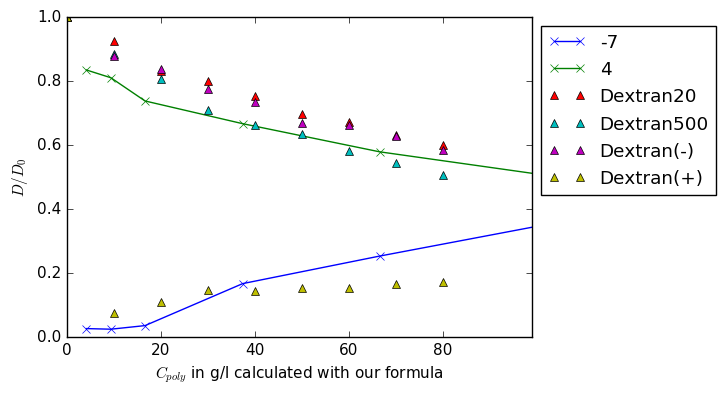

In [371]:
uArr = [-7,4]
a_arr=[0.2, 0.3, 0.4, 0.6, 0.8, 1]
cpoly_arr = [4.16025, 9.360562499999997, 16.641, 37.44224999999999, 66.564, 104.00625]
kAtt_arr= [0.64, 0.82, 0.93, 1.0, 1.1, 1.1]
kRep_arr= [0.68, 0.91, 1.1, 1.3, 1.4, 1.4]
kArrays = [kAtt_arr,kRep_arr] # kdir must correspond to U_0 values. They are different, due to different buffer used by Jason
data = getCpolyData(uArr,a_arr,kArrays,dt='0.001')
#print(data)
plotCpolyData(data,cpoly_arr)

### aop = 0.54

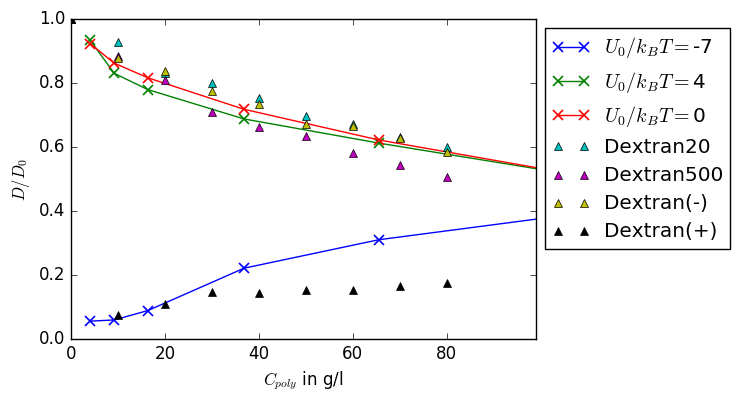

In [412]:
uArr = [-7,4,0]
a_arr=[0.2, 0.3, 0.4, 0.6, 0.8, 1]
cpoly_arr = [4.093526943452589, 9.210435622768324, 16.374107773810355, 36.8417424910733, 65.49643109524142, 102.33817358631472]
kAtt_arr =[0.63, 0.82, 0.93, 1.0, 1.1, 1.1]
kRep_arr =[0.68, 0.91, 1.1, 1.3, 1.4, 1.4]
kNeut_arr =len(a_arr) * [1.0]
kArrays = [kAtt_arr,kRep_arr,kNeut_arr] # kdir must correspond to U_0 values. They are different, due to different buffer used by Jason
data = getCpolyData(uArr,a_arr,kArrays,dt='0.001',aop=.54,steric='/steric')
#print(data)
plotCpolyData(data,cpoly_arr,toFile=True,filename='D_over_Cpoly_aop054_u4_-7_a031.pdf')

____
### b_fit = 23 nm

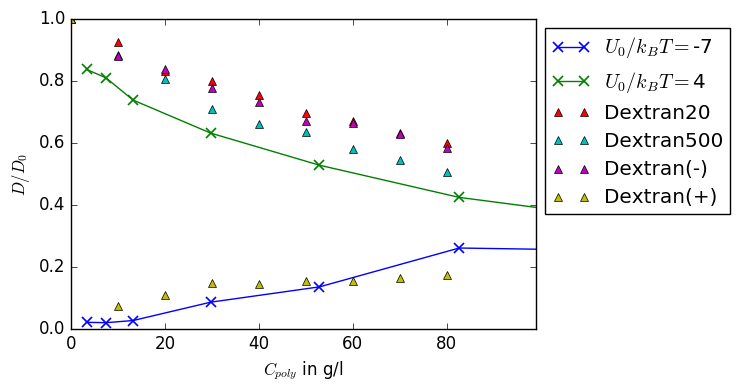

In [13]:
uArr = [-7,4]
a_arr=[0.2, 0.3, 0.4, 0.6, 0.8, 1, 1.2]
cpoly_arr =[3.30625, 7.439062499999999, 13.225, 29.756249999999994, 52.9, 82.65625, 119.02499999999998]
kAtt_arr = [0.66, 0.86, 1.0, 1.1, 1.2, 1.2, 1.3]
kRep_arr = [0.69, 0.95, 1.1, 1.4, 1.5, 1.6, 1.6]
kArrays = [kAtt_arr,kRep_arr] # kdir must correspond to U_0 values. They are different, due to different buffer used by Jason
data = getCpolyData(uArr,a_arr,kArrays,dt='0.001')
plotCpolyData(data,cpoly_arr,toFile=True,filename='D_over_Cpoly_aop054_u4_-7_a035.pdf')

_______
______
_____

# Compare fig 2 to simulations


According to Jason, PEG has a monomer diameter of about 0.4 to 0.5. *This already includes hydration* since it is the hydrodynamic radius of a PEG monomer.
Using the polymer volume fraction, as below, I only need a value for aop to record the simulation.

## TODO repeat this using the specific volume of PEG to calculate phi

I can use the specific volume of PEG given in [1] and [2] to calculate the polymer volume fraction in Jasons experiments in figure 2 and thus to compare to my simulation data.
According to Jason, he used 20kDa PEG at room temperature. The specific volume for PEG with a weight 20kDa = 20kg/mol = 20000g/mol at $T=298.15$ K is given in [2] as approximately $v \approx 0.833 cm^3/g$. I'm not sure I understand the data in reference [1]. Using the specific volume, I can calculate the polymer volume fraction:
$$\phi = v \cdot C_{poly}$$

- [1] http://link.springer.com/article/10.1007%2Fs10953-009-9388-1#/page-1
- [2] http://www.sciencedirect.com/science/article/pii/S0378381298003690

In [436]:
def plotPEGCpolyData(dd0data,cpolyArr,titleArr=[],toFile=False,filename='tmp'): 
    pltPrintPar()
    plt.figure(facecolor='white',figsize=(6,4))
    if titleArr == []:
        titleArr = len(dd0data)*[""]
    for i,dat in enumerate(dd0data):
        ti = titleArr[i]
        dd0 = dat[:,1]/6.
        plt.plot(cpolyArr[i],dd0,'x-',label=ti,mew=1.2,ms=7)
    for i,exdat in enumerate(bpj4data):
        ti = bpj4titles[i]
        dd0 = exdat[:]
        cpoly = bpj4xvals
        #TODO plt.plot(cpoly,dd0,'^',label=ti)
    plt.legend(loc=2, bbox_to_anchor=(1, 1),
              ncol=1, fancybox=False, shadow=False)
    plt.xlim([0,99])
    plt.ylabel('$D/D_0$')
    plt.xlabel('$C_{poly}$ in g/l')
    if toFile:
        plt.rcdefaults()
        plt.savefig('figures/'+filename+'.png', bbox_inches='tight')
    else:
        plt.show()

In [ ]:
# PEG
a_ex = 0.45
m_a_PEG = 44.05
# source https://en.wikipedia.org/wiki/Acetaldehyde

# ALEXA: --> aop=0.3
# p_ex = 1.5 --> aop = 0.3
uArr=[0]
a_arr=[0.2, 0.5, 0.8, 1, 1.2, 1.4, 1.6, 1.7, 1.8, 1.9, 2]
bex_arr = np.array([a_ex/(a/10) for a in a_arr])
print(bex_arr)
kArrays=[len(a_arr)*[1.0]]
cpolydataALEX_PEG = CpolyFromb(bex_arr,a_ex,m_a=m_a_PEG)
dataALEX_PEG=getCpolyData(uArr,a_arr,kArrays,dt='0.001',aop=0.3)

# phycoerythrin
# p_ex = 5.6 --> aop = 0.08
uArr=[0]
a_arr=[0.05, 0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.63, 0.67, 0.7]
bex_arr = np.array([a_ex/(a/10) for a in a_arr])
print(bex_arr)
kArrays=[len(a_arr)*[1.0]]
cpolydataPHY_PEG = CpolyFromb(bex_arr,a_ex,m_a=m_a_PEG)
dataPHY_PEG=getCpolyData(uArr,a_arr,kArrays,dt='0.001',aop=0.08)

#Combine it
cpolydata=[cpolydataPHY_PEG,cpolydataALEX_PEG]
data=dataPHY_PEG+dataALEX_PEG
plotPEGCpolyData(data,cpolydata)

_________
_________
_________
___________
_________
_________
_________
___________
_________
_________
_________
___________
# OLD BAD STUFF

### Correction to the result of eq. 22 in relation to the experimental value
In the experiment in fig. 13 in our EPJE paper, Jason used an polymer concentration of 1(w/v)\%.
With our formula in eq. 22, we obtain 0.39(w/v)\%.
So, to correct the polymer concentrations calculated with eq. 22, we weight the calculated polymer concentration with the ratio of the experimental value, to the calculated value.
The resulting data fits Jasons data much better (compare it to bpj fig. 4)

In [210]:
def plotCpolyDataOLD(u0data,b_ex_fit=1,rescaleCpoly=False): 
    pltPrintPar()
    plt.figure(facecolor='white',figsize=(6,4))
    # The p value needs to be corrected, since I calculate using the aop = a_exCpoly/p_exCpoly = 0.21 ratio, whereas the 
    # simulations are performed using the aop = 0.53 ratio, such that the hydration shell does not move with the tracer.
    cpolyCorrection = 10/CpolyFromb(b_ex_fit) # CpolyExp = 10 mM
    for i,u0dat in enumerate(u0data):
        ti = str(uArr[i])
        p_rel_sim = u0dat[:,0]
        p_rel_calc = prel_simToCalc(p_rel_sim)
        dd0 = u0dat[:,1]/6.
        cpoly = CpolyFrompHI(p_rel_calc)
        if rescaleCpoly:
            cpoly *= cpolyCorrection
        plt.plot(cpoly,dd0,'o-',label=ti)
    for i,exdat in enumerate(bpj4data):
        ti = bpj4titles[i]
        dd0 = exdat[:]
        cpoly = bpj4xvals
        plt.plot(cpoly,dd0,'^',label=ti)
    plt.legend(loc=2, bbox_to_anchor=(1, 1),
              ncol=1, fancybox=False, shadow=False)
    plt.xlim([0,90])
    plt.ylabel('$D/D_0$')
    plt.xlabel('$C_{poly}$ in g/l calculated with our formula')
    plt.show()

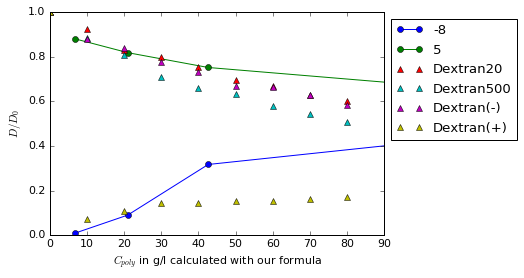

In [101]:
uArr = [-8,5]
kArr = ['0.670','0.750'] # kdir must correspond to U_0 values. They are different, due to different buffer used by Jason
data = getCpolyData(uArr,kArr)
plotCpolyData(data,32,True)

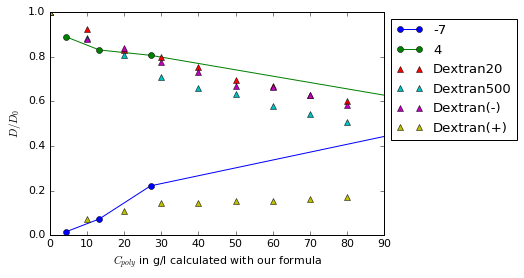

In [103]:
uArr = [-7,4]
kArr = ['0.840','0.940'] # kdir must correspond to U_0 values. They are different, due to different buffer used by Jason
data = getCpolyData(uArr,kArr)
plotCpolyData(data,25.5,True)

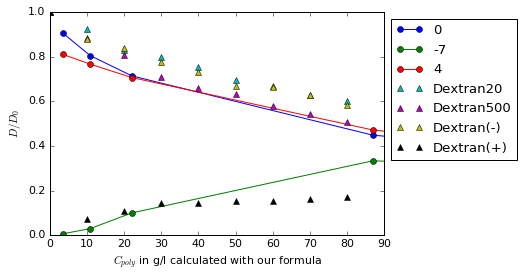

In [106]:
uArr = [0,-7,4]
kArr = 3*['1.000']
data = getCpolyData(uArr,kArr,dt='0.0005')
plotCpolyData(data,23,True)

# TODO find more suitable parameters a/b and p/b
# EVALUATE DATA FROM SHELDON
/Users/jh/Documents/Remote_PC/sheldon_scratch/HI/sim/Release/sim_data/noreset/fitRPinv/test/CG/ntry1/nrods1/steric

I need to run simulations for this as soon as I found a good mesh size for the HI simulations in comparison to Jasons data.
With the new data: I need to re-run the simulations with:
- correct $U_0$ values, that lead to good agreement Cion data
- correct $k$ values, calculated with krelFromCion(Cion,b_ex). Here, I need to use the
- correct $b_ex$ value, that leads to good agreement in the Cion plot for the HI simulations
Finally, using the new simulation data, I have to plot the data WITH and WITHOUT the appropriate Correction term cpolyCorrection
